In [1]:
#preprocess step
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Function to handle outliers
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df



# Load the dataset
df = pd.read_csv(r'C:\Users\nh013\Desktop\traffic control.csv\traffic.csv')

# Feature selection
df = df[['DateTime','Junction','Vehicles','ID']]

# Identify missing values
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)

# Fill missing values with mean or median
mean = df.mean()
df.fillna(mean, inplace=True)

# Fill missing values with mode
mode = df.mode().iloc[0]
df.fillna(mode, inplace=True)

# Fill missing values with forward fill
df.fillna(method='ffill', inplace=True)

# Fill missing values with backward fill
df.fillna(method='bfill', inplace=True)


# One-hot encode categorical variable 'Junction'
df = pd.get_dummies(df, columns=['Junction'])

# Handle outliers
df = handle_outliers(df, 'Vehicles')

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Data transformation
scaler = MinMaxScaler()
df[['Vehicles']] = scaler.fit_transform(df[['Vehicles']])

# Calculate the number of vehicles per junction and ID
vehicles_per_junction_id = df.groupby(['DateTime', 'ID'])['Vehicles'].sum()

# Print cleaned and transformed dataframe
print(df)
print(df.shape[0])

# Print the number of vehicles per junction and ID
print(vehicles_per_junction_id)


DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64
                  DateTime  Vehicles           ID  Junction_1  Junction_2  \
0      2015-11-01 00:00:00  0.241379  20151101001           1           0   
1      2015-11-01 01:00:00  0.206897  20151101011           1           0   
2      2015-11-01 02:00:00  0.155172  20151101021           1           0   
3      2015-11-01 03:00:00  0.103448  20151101031           1           0   
4      2015-11-01 04:00:00  0.137931  20151101041           1           0   
...                    ...       ...          ...         ...         ...   
48115  2017-06-30 19:00:00  0.172414  20170630194           0           0   
48116  2017-06-30 20:00:00  0.500000  20170630204           0           0   
48117  2017-06-30 21:00:00  0.258621  20170630214           0           0   
48118  2017-06-30 22:00:00  0.362069  20170630224           0           0   
48119  2017-06-30 23:00:00  0.189655  20170630234           0           0   

      

C:\Users\nh013\AppData\Local\Temp\ipykernel_9272\841737672.py:29: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = df.mean()


In [3]:
#feature engineering
## Calculate rolling mean and standard deviation for 'vehicles' column


import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Function to handle outliers
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


# Load the dataset
df = pd.read_csv(r'C:\Users\nh013\Desktop\traffic control.csv\traffic.csv')

# Feature selection
df = df[['DateTime','Junction','Vehicles','ID']]

# Identify missing values
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)

# Fill missing values with mean or median
mean = df.mean()
df.fillna(mean, inplace=True)

# Fill missing values with mode
mode = df.mode().iloc[0]
df.fillna(mode, inplace=True)

# Fill missing values with forward fill
df.fillna(method='ffill', inplace=True)

# Fill missing values with backward fill
df.fillna(method='bfill', inplace=True)


# One-hot encode categorical variable 'Junction'
df = pd.get_dummies(df, columns=['Junction'])

# Handle outliers
df = handle_outliers(df, 'Vehicles')

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Data transformation
scaler = MinMaxScaler()
df[['Vehicles']] = scaler.fit_transform(df[['Vehicles']])

# Normalize and scale all numerical columns
scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])



# Calculate rolling mean and standard deviation for 'Vehicles' column
df['Average_rolling_mean'] = df['Vehicles'].rolling(window=30).mean()
df['Average_rolling_std'] = df['Vehicles'].rolling(window=30).std()

# Drop rows with NaN values after calculating rolling mean and std
df.dropna(inplace=True)


# Print cleaned and transformed dataframe
print(df)
print(df.shape[0])


DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64
                  DateTime  Vehicles        ID  Junction_1  Junction_2  \
29     2015-11-02 05:00:00 -0.548444 -2.001083    1.738170   -0.698461   
30     2015-11-02 06:00:00 -0.397522 -2.001082    1.738170   -0.698461   
31     2015-11-02 07:00:00 -0.322061 -2.001080    1.738170   -0.698461   
32     2015-11-02 08:00:00 -0.472983 -2.001078    1.738170   -0.698461   
33     2015-11-02 09:00:00  0.281630 -2.001077    1.738170   -0.698461   
...                    ...       ...       ...         ...         ...   
48115  2017-06-30 19:00:00 -0.548444  1.282975   -0.575318   -0.698461   
48116  2017-06-30 20:00:00  0.885320  1.282977   -0.575318   -0.698461   
48117  2017-06-30 21:00:00 -0.171138  1.282979   -0.575318   -0.698461   
48118  2017-06-30 22:00:00  0.281630  1.282980   -0.575318   -0.698461   
48119  2017-06-30 23:00:00 -0.472983  1.282982   -0.575318   -0.698461   

       Junction_3  Junction_4  Average_rol

C:\Users\nh013\AppData\Local\Temp\ipykernel_9272\1378434186.py:32: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = df.mean()


DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64


C:\Users\nh013\AppData\Local\Temp\ipykernel_9272\2706996295.py:42: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = df.mean()


                 DateTime  Vehicles        ID  Junction_1  Junction_2  \
3     2015-11-01 03:00:00 -0.850295 -2.001593    1.738405   -0.698496   
4     2015-11-01 04:00:00 -0.699377 -2.001591    1.738405   -0.698496   
5     2015-11-01 05:00:00 -0.925754 -2.001589    1.738405   -0.698496   
6     2015-11-01 06:00:00 -0.699377 -2.001588    1.738405   -0.698496   
7     2015-11-01 07:00:00 -0.774836 -2.001586    1.738405   -0.698496   
...                   ...       ...       ...         ...         ...   
48115 2017-06-30 19:00:00 -0.548458  1.282971   -0.575240   -0.698496   
48116 2017-06-30 20:00:00  0.885268  1.282972   -0.575240   -0.698496   
48117 2017-06-30 21:00:00 -0.171162  1.282974   -0.575240   -0.698496   
48118 2017-06-30 22:00:00  0.281594  1.282976   -0.575240   -0.698496   
48119 2017-06-30 23:00:00 -0.472999  1.282977   -0.575240   -0.698496   

       Junction_3  Junction_4      year     month       day      hour  minute  \
3       -0.695222   -0.328904 -2.012395  1

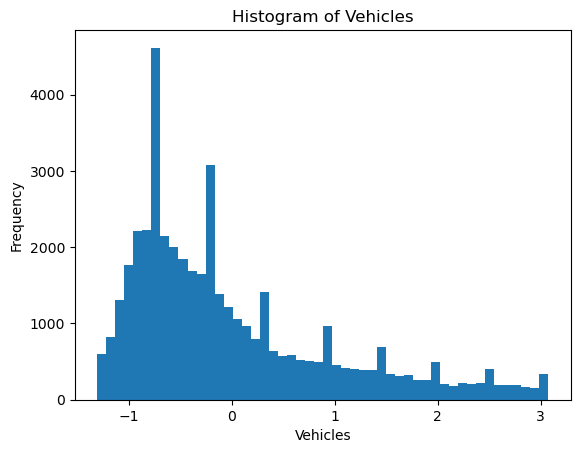

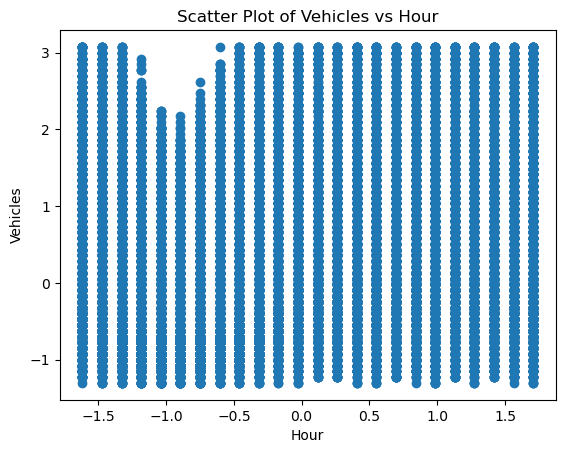

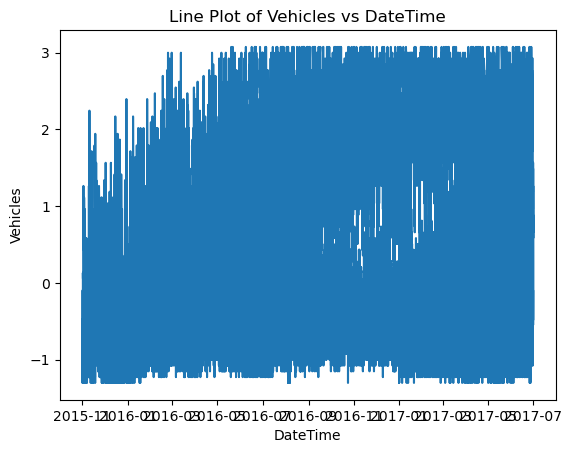

In [8]:
#using dynamic feature 


#add dynamic features to the preprocessed data, add lag features for the numerical variables and time-based 
#features for the datetime variable. 
#added the following dynamic features:
#Year, month, day, hour, minute, and dayofweek extracted from the datetime column.
#Lag features for the Vehicles column with lags of 1, 2, and 3.


import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

# Function to handle outliers
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df



# Load the dataset
df = pd.read_csv(r'C:\Users\nh013\Desktop\traffic control.csv\traffic.csv')

# Feature selection
df = df[['DateTime','Junction','Vehicles','ID']]

# Identify missing values
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)

# Fill missing values with mean or median
mean = df.mean()
df.fillna(mean, inplace=True)

# Fill missing values with mode
mode = df.mode().iloc[0]
df.fillna(mode, inplace=True)

# Fill missing values with forward fill
df.fillna(method='ffill', inplace=True)

# Fill missing values with backward fill
df.fillna(method='bfill', inplace=True)


# One-hot encode categorical variable 'Junction'
df = pd.get_dummies(df, columns=['Junction'])

# Handle outliers
df = handle_outliers(df, 'Vehicles')

# Add dynamic features
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['year'] = df['DateTime'].dt.year
df['month'] = df['DateTime'].dt.month
df['day'] = df['DateTime'].dt.day
df['hour'] = df['DateTime'].dt.hour
df['minute'] = df['DateTime'].dt.minute
df['dayofweek'] = df['DateTime'].dt.dayofweek
df['lag1'] = df['Vehicles'].shift(1)
df['lag2'] = df['Vehicles'].shift(2)
df['lag3'] = df['Vehicles'].shift(3)

# Remove rows with missing values due to the lag features
df.dropna(inplace=True)

# Data transformation
scaler = MinMaxScaler()
df[['Vehicles', 'lag1', 'lag2', 'lag3']] = scaler.fit_transform(df[['Vehicles', 'lag1', 'lag2', 'lag3']])

# Normalize and scale all numerical columns
scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# Print cleaned and transformed dataframe
print(df)
print(df.shape[0])

# Plot histogram of 'Vehicles' column
plt.hist(df['Vehicles'], bins=50)
plt.xlabel('Vehicles')
plt.ylabel('Frequency')
plt.title('Histogram of Vehicles')
plt.show()

# Plot scatter plot of 'Vehicles' against 'hour'
plt.scatter(df['hour'], df['Vehicles'])
plt.xlabel('Hour')
plt.ylabel('Vehicles')
plt.title('Scatter Plot of Vehicles vs Hour')
plt.show()

# Plot line plot of 'Vehicles' against 'DateTime'
plt.plot(df['DateTime'], df['Vehicles'])
plt.xlabel('DateTime')
plt.ylabel('Vehicles')
plt.title('Line Plot of Vehicles vs DateTime')
plt.show()